In [144]:
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy
np.random.seed(7) # To make repeatable
LEARNING_RATE = 0.01
EPOCHS = 20
TRAIN_IMAGE_FILENAME = 'train-images.idx3-ubyte'
TRAIN_LABEL_FILENAME = 'train-labels.idx1-ubyte'
TEST_IMAGE_FILENAME  = 't10k-images.idx3-ubyte'
TEST_LABEL_FILENAME  = 't10k-labels.idx1-ubyte'

In [145]:
# uncomment and see what happens . added by me 
# train_images = idx2numpy.convert_from_file(
#         TRAIN_IMAGE_FILENAME)
# train_labels = idx2numpy.convert_from_file(
#         TRAIN_LABEL_FILENAME)
# test_images = idx2numpy.convert_from_file(
#         TEST_IMAGE_FILENAME)
# test_labels = idx2numpy.convert_from_file(
#         TEST_LABEL_FILENAME)
# print('Dimensions of the train images file :', train_images.shape )
# print('Dimensions of the test images file :', test_images.shape )
# print('Dimensions of the train labels file :', train_labels.shape )
# print('Dimensions of the test images file :', test_images.shape )


# #print one training example
# print('Label for first training example: ', train_labels[0])
# print('-----beginning of pattern for first training example---')
# for line in train_images[1]:
#     for num in line:
#         if(num>0):
#             print('*', end = ' ')
#         else:
#             print(' ', end = ' ')
#     print(' ')
# print('---end of pattern for first training example---')

In [146]:
# Function to read dataset.
def read_mnist():
    train_images = idx2numpy.convert_from_file(
        TRAIN_IMAGE_FILENAME)
    train_labels = idx2numpy.convert_from_file(
        TRAIN_LABEL_FILENAME)
    test_images = idx2numpy.convert_from_file(
        TEST_IMAGE_FILENAME)
    test_labels = idx2numpy.convert_from_file(
        TEST_LABEL_FILENAME)
#     modifications before training
    # Reformat and standardize.
    x_train = train_images.reshape(60000, 784)
    mean = np.mean(x_train)
    stddev = np.std(x_train)
    x_train = (x_train - mean) / stddev
    x_test = test_images.reshape(10000, 784)
    x_test = (x_test - mean) / stddev
    
    # One-hot encoded output.
    y_train = np.zeros((60000, 10))
    y_test = np.zeros((10000, 10))
    for i, y in enumerate(train_labels):
        y_train[i][y] = 1
    for i, y in enumerate(test_labels):
        y_test[i][y] = 1
    return x_train, y_train, x_test, y_test

# Read train and test examples.
x_train, y_train, x_test, y_test = read_mnist()
index_list = list(range(len(x_train))) # Used for random order



In [147]:
def layer_w(neuron_count, input_count):
    weights = np.zeros((neuron_count, input_count+1))
    for i in range(neuron_count):
        for j in range(1, (input_count+1)):
            weights[i][j] = np.random.uniform(-0.1, 0.1)
    return weights


In [148]:
# Declare matrices and vectors representing the neurons.
hidden_layer_w = layer_w(25, 784) #(number of neurons, number of links to each neuron) from 784 pixels to 25 neurons
# 25 unnai ,okko dantlo 784 unnai
hidden_layer_y = np.zeros(25) #(number of hidden layer neurons)
hidden_layer_error = np.zeros(25)#(total number of errors = total number of neurons)
output_layer_w = layer_w(10, 25)#(number of output neurons, number of hidden layer neurons) from 25 neurons to 10 neurons
output_layer_y = np.zeros(10)#(number of output layer neurons)
output_layer_error = np.zeros(10)#(total number of errors = total number of neurons)

In [149]:
chart_x = []
chart_y_train = []
chart_y_test = []
def show_learning(epoch_no, train_acc, test_acc):
    global chart_x
    global chart_y_train
    global chart_y_test
    print('epoch no:', epoch_no, ', train_acc: ',
        '%6.4f' % train_acc,
        ', test_acc: ', '%6.4f' % test_acc)
    chart_x.append(epoch_no + 1)
    chart_y_train.append(1.0 - train_acc)
    chart_y_test.append(1.0 - test_acc)

In [150]:
def plot_learning():
    plt.plot(chart_x, chart_y_train, 'r-',
        label='training error')
    plt.plot(chart_x, chart_y_test, 'b-',
        label='test error')
    plt.axis([0, len(chart_x), 0.0, 1.0])
    plt.xlabel('training epochs')
    plt.ylabel('error')
    plt.legend()
    plt.show()

In [151]:
# hidden_layer_w(25, 784)
# output_layer_w(10, 25)
def forward_pass(x):  #x is one example [1 x01 x02 .......x0784]. total 785 columns . the first element is bias term
#     x.shape
#     print(output_layer_w) #10unnai , okko dantlo 25 unnai
    global hidden_layer_y
    global output_layer_y
    # Activation function for hidden layer
    for i, w in enumerate(hidden_layer_w):# this loop runs 25 times
        z = np.dot(w, x)# (1*784).(784*1) #z is a single value  like -8.253058590285834
#         print('z is ', z)
        hidden_layer_y[i] = np.tanh(z)
    hidden_output_array = np.concatenate(
        (np.array([1.0]), hidden_layer_y))
    # Activation function for output layer
    for i, w in enumerate(output_layer_w):
#         print('hello')
        z = np.dot(w, hidden_output_array)
        output_layer_y[i] = 1.0 / (1.0 + np.exp(-z))

In [152]:
def backward_pass(y_truth):
    global hidden_layer_error
    global output_layer_error
    # Backpropagate error for each output neuron
    # and create array of all output neuron errors.
    for i, y in enumerate(output_layer_y):
        error_prime = -(y_truth[i] - y) # Loss derivative
        derivative = y * (1.0 - y) # Logistic derivative
        output_layer_error[i] = error_prime * derivative
    for i, y in enumerate(hidden_layer_y):
        # Create array weights connecting the output of
        # hidden neuron i to neurons in the output layer.
        error_weights = []
        for w in output_layer_w:
            error_weights.append(w[i+1])
        error_weight_array = np.array(error_weights)
        # Backpropagate error for hidden neuron.
        derivative = 1.0 - y**2 # tanh derivative
        weighted_error = np.dot(error_weight_array,
                output_layer_error)
        hidden_layer_error[i] = weighted_error * derivative
    
    
def adjust_weights(x):
    global output_layer_w
    global hidden_layer_w
    for i, error in enumerate(hidden_layer_error):
        hidden_layer_w[i] -= (x * LEARNING_RATE
                * error) # Update all weights
    hidden_output_array = np.concatenate(
        (np.array([1.0]), hidden_layer_y))
    for i, error in enumerate(output_layer_error):
        output_layer_w[i] -= (hidden_output_array
            * LEARNING_RATE
            * error) # Update all weights



epoch no: 0 , train_acc:  0.8563 , test_acc:  0.9157
epoch no: 1 , train_acc:  0.9203 , test_acc:  0.9240
epoch no: 2 , train_acc:  0.9276 , test_acc:  0.9279
epoch no: 3 , train_acc:  0.9321 , test_acc:  0.9305
epoch no: 4 , train_acc:  0.9349 , test_acc:  0.9312
epoch no: 5 , train_acc:  0.9385 , test_acc:  0.9343
epoch no: 6 , train_acc:  0.9396 , test_acc:  0.9368
epoch no: 7 , train_acc:  0.9423 , test_acc:  0.9356
epoch no: 8 , train_acc:  0.9432 , test_acc:  0.9334
epoch no: 9 , train_acc:  0.9444 , test_acc:  0.9338
epoch no: 10 , train_acc:  0.9465 , test_acc:  0.9367
epoch no: 11 , train_acc:  0.9476 , test_acc:  0.9363
epoch no: 12 , train_acc:  0.9475 , test_acc:  0.9380
epoch no: 13 , train_acc:  0.9490 , test_acc:  0.9367
epoch no: 14 , train_acc:  0.9504 , test_acc:  0.9391
epoch no: 15 , train_acc:  0.9513 , test_acc:  0.9376
epoch no: 16 , train_acc:  0.9514 , test_acc:  0.9336
epoch no: 17 , train_acc:  0.9523 , test_acc:  0.9393
epoch no: 18 , train_acc:  0.9537 , te

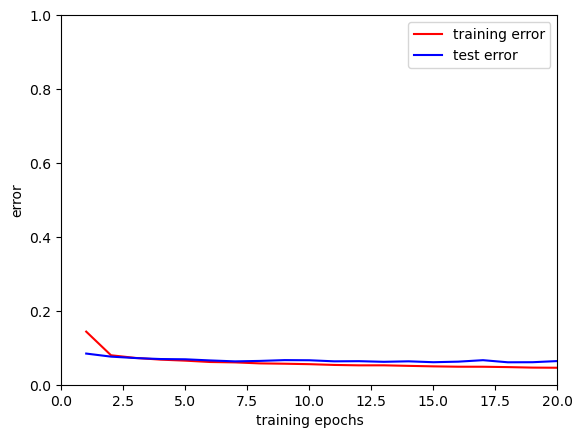

In [153]:
# Network training loop.
# LEARNING_RATE = 0.01
# EPOCHS = 20
# x_train(60000, 784)
# y_train(60000, 10)
# x_test(10000, 784)
# y_test(10000, 10)
for i in range(EPOCHS): # Train EPOCHS iterations
    np.random.shuffle(index_list) # Randomize order
    correct_training_results = 0
    for j in index_list: # Train on all examples
        x = np.concatenate((np.array([1.0]), x_train[j]))# adding value '1' as first coulms with the following columns from x_train[j]
#         print(x)
#         print('x.shape is', x.shape)
        forward_pass(x)
        if output_layer_y.argmax() == y_train[j].argmax():
            correct_training_results += 1
        backward_pass(y_train[j])
        adjust_weights(x)
        
    correct_test_results = 0
    for j in range(len(x_test)): # Evaluate network
        x = np.concatenate((np.array([1.0]), x_test[j]))
        forward_pass(x)
        if output_layer_y.argmax() == y_test[j].argmax():
            correct_test_results += 1
    # Show progress.
    show_learning(i, correct_training_results/len(x_train),
        correct_test_results/len(x_test))
plot_learning() # Create plot